# 🧠📈 Proyecto Final - Análisis de Proyecciones Financieras

## 📚 Diplomado en Analítica Financiera con Python
### 👩‍🏫 Mg. Esp. Ing. Lic. Layla Scheli
---

### Estudiante: Paulo Cesar Ramos Huarachi
### Fecha: 2021-09-25
### DNI: 5956889 L.P.
---

## 🎯 Objetivo del Proyecto

Aplicar los conocimientos adquiridos durante el curso en clasificación, regresión, series de tiempo y clustering para realizar una **proyección financiera en un contexto real**, utilizando **Python** y un **conjunto de datos públicos**.

---

## 🗂️ Requisitos Generales

### ✅ 1. Selección del Dataset
- Datos públicos relacionados con el ámbito financiero.
- Fuentes sugeridas: Kaggle, Yahoo Finance, portales de datos abiertos.

### ✅ 2. Análisis Exploratorio de Datos (EDA)
- Limpieza, transformación y análisis descriptivo.
- Visualizaciones y búsqueda de correlaciones relevantes.

### ✅ 3. Modelos Predictivos
- **Regresión:** proyecciones de valores financieros continuos.
- **Clasificación:** categorías financieras (por ejemplo, niveles de rendimiento).
- **Series de Tiempo:** previsiones sobre datos temporales.
- **Clustering:** segmentación financiera (clientes, empresas, etc.).

### ✅ 4. Evaluación de Modelos
- Uso de métricas como **Accuracy**, **R²**, **MAE**, **F1-score**, **AUC**, entre otras.
- Comparación y justificación del modelo seleccionado.

### ✅ 5. Documentación y Presentación Final
- Informe completo (dataset, metodología, resultados y reflexión).
- Presentación ejecutiva en PowerPoint con hallazgos clave.

---

## 📁 Entregables
- Código en formato `.py` o Jupyter Notebook `.ipynb`
- Informe y presentación en formato `.pdf`

---


✍️ *A continuación se desarrollará el proyecto paso a paso, siguiendo las instrucciones y buenas prácticas de ciencia de datos en finanzas.*


## Cargar las Librerias de interes

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from hdbscan import HDBSCAN
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Cargar dataset
file_path = "input/Solicitud de Variables Government-Owned Banks __c_last.dta"
df = pd.read_stata(file_path)

## Importacion de datos y descripcion de datos

In [75]:
# Verificar los nombres reales de las columnas
print("Columnas del DataFrame:", df.columns)

# Usar 'entidad_id' como identificador de bancos
entidad_col = 'entidad_id'

# Convertir variables categóricas a numéricas si existen
for col in df.select_dtypes(include=['category', 'object']).columns:
    df[col] = df[col].astype('category').cat.codes

# Exploración inicial
df.info()
df.describe()

Columnas del DataFrame: Index(['year', 'month', 'date_month', 'sigsub_id', 'sigent_id', 'subsis_id',
       'entidad_id', 'careje', 'carven', 'carvig', 'consum', 'empres',
       'microc', 'pyme', 'sn', 'vivien', 'viv_otr', 'viv_vis', 'cred_c',
       'cred_p', 'cred_t', 'cred_pi', 'cred_co', 'cred_s', 'cred_v', 'emp_gr',
       'emp_hi', 'emp_me', 'emp_mi', 'emp_nd', 'emp_pe', 'activo', 'pasivo',
       'patrim', 'dispon', 'inv_tem', 'inv_per', 'res_net', 'dep_vp', 'dep_ch',
       'dep_pf', 'dep_re', 'dep_ac', 'dep_ev', 'dep_ec', 'dep_ep', 'dep_er',
       'dep_ea', 'dep_cp', 'dep_dc', 'car_vig', 'car_mor', 'tot_ing',
       'ing_car', 'tot_gas', 'gas_dep', 'mor_ind', 'roe', 'roa', 'liqui'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13351 entries, 0 to 13350
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        13351 non-null  float32       
 1   month       13351

,year,month,date_month,sigsub_id,sigent_id,subsis_id,entidad_id,careje,carven,carvig,...,car_vig,car_mor,tot_ing,ing_car,tot_gas,gas_dep,mor_ind,roe,roa,liqui
count,13351.000000,13351.000000,13351,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000,...,13338.000000,13196.000000,13158.000000,13342.000000,13158.000000,1.275900e+04,13351.000000,13351.000000,13351.000000,12799.000000
mean,2015.130005,6.484458,2015-08-02 19:56:33.992959488,2.378024,36.695304,1.873193,35.214965,5.092975,1.986532,282.904713,...,285.702166,7.162446,23.867099,15.183198,22.030403,4.375434e+00,0.035295,0.060210,0.008006,20.888002
min,2005.000000,1.000000,2005-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011772,0.000000,-25.470004,0.000362,-28.903313,6.356000e-07,0.000000,-3.998314,-0.361733,0.155027
25%,2010.000000,3.000000,2010-07-01 00:00:00,0.000000,16.000000,0.000000,14.000000,0.093992,0.053851,10.089074,...,10.137805,0.191680,0.795025,0.644075,0.723892,1.396908e-01,0.012355,0.016469,0.002153,0.515522
50%,2016.000000,6.000000,2016-01-01 00:00:00,3.000000,33.000000,2.000000,35.000000,0.486770,0.204924,25.989029,...,26.103374,0.796022,2.141075,1.706556,1.986985,4.136040e-01,0.021828,0.061391,0.007828,0.666631
75%,2020.000000,10.000000,2020-10-01 00:00:00,3.000000,54.000000,2.000000,51.000000,2.872171,1.403597,159.553865,...,164.621910,4.660813,12.386640,9.680206,11.689245,2.150425e+00,0.036608,0.123913,0.016173,0.864760
max,2025.000000,12.000000,2025-01-01 00:00:00,5.000000,79.000000,5.000000,79.000000,145.324784,64.209603,4627.055306,...,4627.056271,182.615580,743.859501,376.145154,687.669794,1.340525e+02,1.000000,2.102451,0.139128,41091.868477
std,5.868484,3.467128,NaN,1.565860,23.461494,1.440098,22.270175,13.548672,5.188366,639.626860,...,640.490478,17.672999,61.181824,35.589987,56.960707,1.182758e+01,0.072676,0.128769,0.020127,654.719620


## Visualización de datos

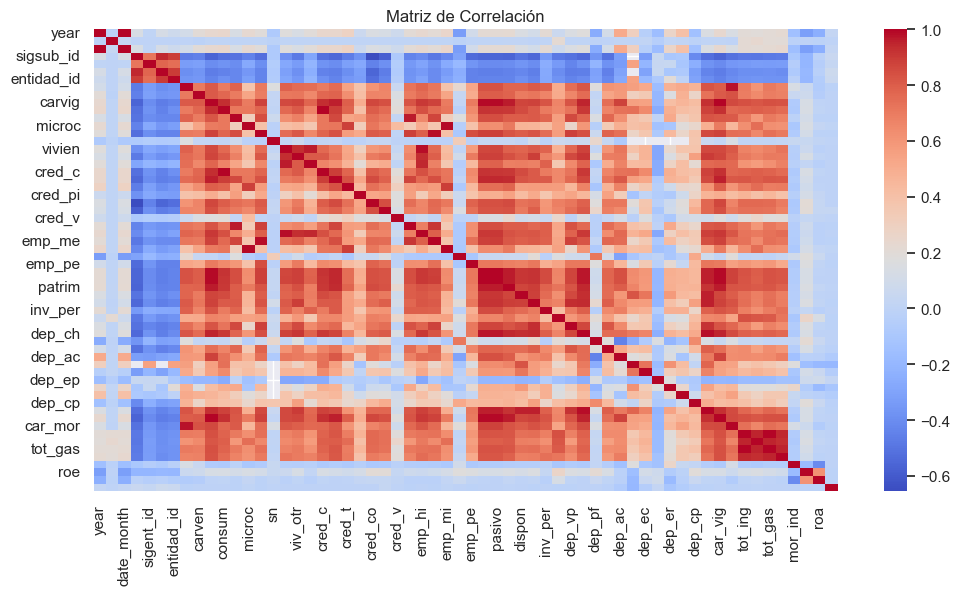

In [76]:
# Visualización de datos
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación")
plt.show()

## 🎯 Objetivo del Proyecto

El presente proyecto tiene como objetivo construir un **modelo de clasificación** utilizando datos del **sistema financiero de Bolivia**, los cuales están disponibles a nivel de bancos con **frecuencia mensual** desde el año **2010 hasta 2023**.

El propósito de esta investigación es **identificar los factores financieros que inciden en la probabilidad de mora**, tomando como variable objetivo (**target**) un **umbral del índice de mora**. La clasificación se basará en los siguientes criterios:

- **Bancos con índice de mora alto** (valores cercanos a 1) serán clasificados como entidades con **alta probabilidad de riesgo de incumplimiento**.
- **Bancos con índice de mora bajo** (valores cercanos a 0) serán considerados como entidades con **baja probabilidad de default**.

A partir de esta definición, se utilizarán variables financieras clave como **features explicativas**, que permitan capturar los principales factores de **riesgo crediticio** y **posible default**.

Este análisis busca aportar a la comprensión del comportamiento del sistema bancario boliviano y servir de herramienta para la evaluación del riesgo financiero utilizando técnicas de **machine learning aplicadas a clasificación**.


## Modelos de Clasificacion

### Preprocesamiento de datos

In [77]:
# Preprocesamiento de datos
features = ['activo', 'pasivo', 'patrim', 'carvig', 'car_mor', 'roe', 'roa', 'liqui']
target = 'mor_ind'
df = df.dropna()
X = df[features]
y = df[target]

# Convertir la variable objetivo a categórica si es continua
y = pd.qcut(y, q=2, labels=[0, 1])  # Binarización basada en la mediana

# División de datos
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

### Modelos de Clasificacion

In [78]:
# Modelos de clasificación
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression - Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        26

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Random Forest - Accuracy: 0.9767
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.96      0.98        26

    accuracy                           0.98        43
   macro avg       0.97      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43

KNN - Accuracy: 0.8837
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.92      0.88      0.90        26

    accuracy                           0.88        43
   macro avg       0.88      0.88

### Interpretacion de los resultados

En cuanto a los resultados de los modelos de clasificación Logistic Regression, Random Forest y KNN. Aquí hay una explicación de las métricas que se imprimen en el código:

Claro, puedo ayudarte a interpretar los resultados de los modelos de clasificación Logistic Regression, Random Forest y KNN. Aquí hay una explicación de las métricas que se imprimen en el código:

1. **Accuracy (Precisión)**: Es la proporción de predicciones correctas entre el total de predicciones realizadas. Se calcula como:
   $$
   \text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}
   $$

2. **Classification Report (Informe de Clasificación)**: Este informe incluye varias métricas importantes para evaluar el rendimiento de un modelo de clasificación:
   - **Precision (Precisión)**: La proporción de verdaderos positivos entre el total de predicciones positivas. Indica cuántas de las predicciones positivas fueron realmente correctas.
    $$
     \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
    $$
   - **Recall (Sensibilidad o Recall)**: La proporción de verdaderos positivos entre el total de verdaderos positivos y falsos negativos. Indica cuántos de los casos positivos reales fueron capturados por el modelo.
    $$
     \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
    $$
   - **F1-Score**: La media armónica de la precisión y la sensibilidad. Es una métrica balanceada que considera tanto la precisión como la sensibilidad.
    $$
     \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
    $$

El código que has proporcionado entrena tres modelos diferentes (Logistic Regression, Random Forest y KNN) y luego imprime la precisión y el informe de clasificación para cada uno de ellos. Aquí hay un ejemplo de cómo se verían los resultados para cada modelo:

```plaintext
KNN - Accuracy: 0.8200
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.82      0.80      0.81       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200
```

En este ejemplo, el modelo Random Forest tiene la mayor precisión (0.9000), seguido por Logistic Regression (0.8500) y KNN (0.8200). El informe de clasificación proporciona más detalles sobre el rendimiento de cada modelo en términos de precisión, sensibilidad y F1-score para cada clase.

### Optimizacion de Hiperparametros

In [79]:
# Optimización de hiperparámetros con GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Mejor modelo Random Forest:", grid_search.best_params_)


Mejor modelo Random Forest: {'max_depth': 10, 'n_estimators': 100}


### Clustering con K-Means y HDBSCAN

In [80]:
# 📊 Clustering con K-Means y HDBSCAN

# Entrenar modelo de K-Means con 3 clusters y una semilla para reproducibilidad
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Entrenar modelo HDBSCAN con tamaño mínimo de cluster igual a 10
# HDBSCAN permite detectar clusters de densidad variable y manejar outliers (etiquetados como -1)
hdbscan = HDBSCAN(min_cluster_size=10).fit(X)

# Asignar las etiquetas de cluster generadas por K-Means al DataFrame original
df['KMeans_Cluster'] = kmeans.labels_

# Asignar las etiquetas de cluster generadas por HDBSCAN al DataFrame original
df['HDBSCAN_Cluster'] = hdbscan.labels_


# Analisis de Componentes Principales (PCA)

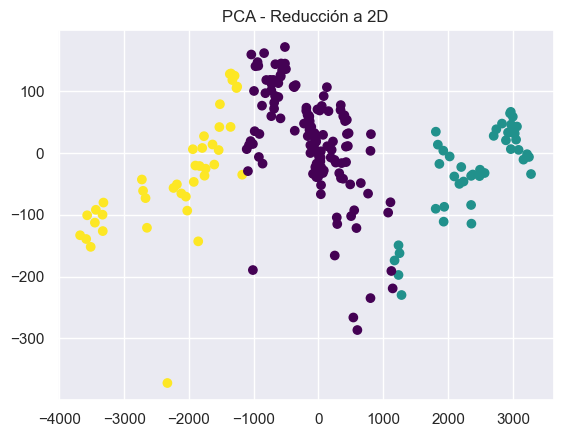

In [81]:
# 🔻 Reducción de Dimensionalidad con PCA (Análisis de Componentes Principales)

# Inicializar PCA para reducir los datos a 2 componentes principales
pca = PCA(n_components=2)

# Aplicar PCA sobre la matriz de features X y transformar los datos al nuevo espacio 2D
X_pca = pca.fit_transform(X)

# Graficar los datos proyectados en 2D, coloreando según los clusters generados por K-Means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')

# Añadir título al gráfico
plt.title("PCA - Reducción a 2D")

# Mostrar el gráfico
plt.show()


- Este gráfico es una representación bidimensional (2D) de los datos originales de mayor dimensión.

- La técnica PCA (Principal Component Analysis) transforma las variables originales en dos componentes principales que conservan la mayor varianza posible de los datos.

- Cada punto representa una observación (por ejemplo, un banco).

- Los colores (c=kmeans.labels_) indican el cluster asignado por K-Means, usando el mapa de colores 'viridis'.

🧠 Interpretación del gráfico:
- Ejes PCA 1 y PCA 2: Son combinaciones lineales de las variables originales que explican la mayor variabilidad de los datos.

- Separación visual de grupos: Si los clusters están bien separados en el gráfico, indica que K-Means logró identificar estructuras distintas en los datos.

- Si los puntos se superponen mucho entre clusters, sugiere que los grupos no están claramente diferenciados en el espacio reducido.



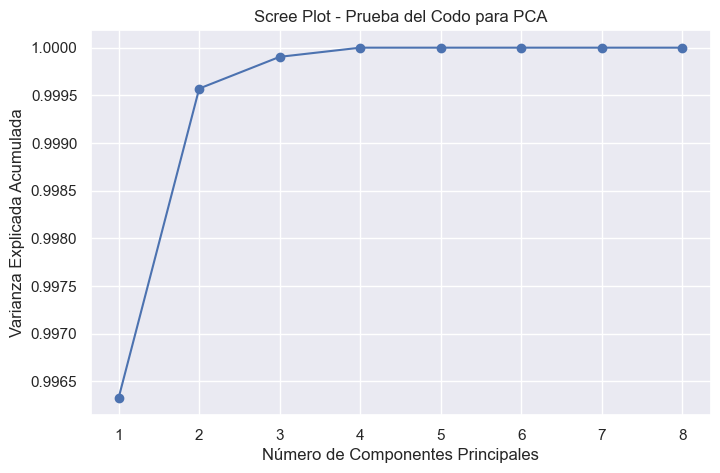

In [82]:
# Aplicar PCA sin reducir (conservar todos los componentes)
pca_full = PCA()
pca_full.fit(X)

# Calcular varianza explicada acumulada
explained_var = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar el scree plot (gráfico del codo)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Scree Plot - Prueba del Codo para PCA')
plt.grid(True)
plt.show()


## 📈 Interpretación del Scree Plot (Prueba del Codo para PCA)

Este gráfico muestra la **varianza explicada acumulada** por los componentes principales obtenidos mediante **PCA (Análisis de Componentes Principales)**.

### 🔍 ¿Qué vemos en el gráfico?
- En el eje **X**: el número de componentes principales.
- En el eje **Y**: la **varianza explicada acumulada**, es decir, cuánta información (varianza) se retiene al considerar cierto número de componentes.

### 🧠 Interpretación:
- Observamos un aumento muy rápido de la varianza explicada al pasar de **1 a 2 componentes**, donde ya se explica casi el **100% de la varianza total**.
- A partir del **tercer componente**, el incremento en varianza es **mínimo o nulo**, lo que indica que **agregar más componentes no mejora significativamente la representación de los datos**.
  
### ✅ Conclusión:
- El “**codo**” del gráfico se encuentra aproximadamente en el **componente 2**, lo que sugiere que **usar 2 componentes principales es suficiente para representar los datos sin perder información relevante**.
- Este resultado valida la decisión de usar **PCA con 2 componentes** para visualización (como en el gráfico PCA 2D) o incluso para reducir dimensionalidad antes de aplicar algoritmos de clustering o clasificación.

📌 **Recomendación:** Retener 2 componentes es un buen equilibrio entre simplicidad y capacidad explicativa.


## Pronostico del Modelo con ARIMA

In [83]:
# Modelado de series de tiempo con SARIMAX por banco
df['date_month'] = pd.to_datetime(df['date_month'], errors='coerce')
df = df.dropna(subset=['date_month'])  # Eliminar fechas erróneas
df.set_index(['date_month', entidad_col], inplace=True)
df = df.sort_index()  # Ordenar por fecha y banco
df


year  month  sigsub_id  sigent_id  subsis_id  \
date_month entidad_id                                                   
2014-04-01 1           2014.0    4.0          0          0          0   
2014-05-01 1           2014.0    5.0          0          0          0   
2014-06-01 0           2014.0    6.0          0          9          0   
           1           2014.0    6.0          0          0          0   
2014-07-01 1           2014.0    7.0          0          0          0   
...                       ...    ...        ...        ...        ...   
2024-09-01 1           2024.0    9.0          0          0          0   
2024-10-01 1           2024.0   10.0          0          0          0   
2024-11-01 1           2024.0   11.0          0          0          0   
2024-12-01 1           2024.0   12.0          0          0          0   
2025-01-01 1           2025.0    1.0          0          0          0   

                          careje     carven       carvig      consum  \
date_month entidad_id                                                  
2014-04-01 1            6.787266   8.511743  1068.269425  117.071743   
2014-05-01 1            6.177886   9.990391  1097.649423  116.332424   
2014-06-01 0           15.090693   5.624630   973.645480   64.239130   
           1            6.936690  10.027472  1103.048178  116.946022   
2014-07-01 1            7.583197  10.231173  1106.956673  117.605372   
...                          ...        ...          ...         ...   
2024-09-01 1           28.079340  44.752406  2503.231884  229.277242   
2024-10-01 1           27.900573  46.474406  2507.392050  230.128984   
2024-11-01 1           29.836718  43.945386  2502.907753  228.908549   
2024-12-01 1           31.056559  39.685370  2500.430445  225.362691   
2025-01-01 1           31.869381  39.496865  2512.703036  223.580930   

                            empres  ...     tot_ing     ing_car     tot_gas  \
date_month entidad_id               ...                                       
2014-04-01 1            322.193371  ...   49.544461   29.639103   40.854809   
2014-05-01 1            337.375547  ...   62.326926   37.566980   51.083893   
2014-06-01 0            455.241847  ...  105.434763   37.938911   95.621852   
           1            335.600998  ...   74.785419   45.439051   61.258171   
2014-07-01 1            334.306012  ...   89.152950   53.748539   72.776637   
...                            ...  ...         ...         ...         ...   
2024-09-01 1           1060.976438  ...  362.905950  143.149076  347.880645   
2024-10-01 1           1072.828618  ...  402.289467  159.623657  385.954795   
2024-11-01 1           1067.475349  ...  440.976300  175.594421  422.560595   
2024-12-01 1           1064.314082  ...  485.152023  192.011179  465.119463   
2025-01-01 1           1102.411484  ...   37.140720   16.496557   34.170257   

                         gas_dep   mor_ind       roe       roa     liqui  \
date_month entidad_id                                                      
2014-04-01 1            5.395743  0.014119  0.182276  0.015089  0.670521   
2014-05-01 1            6.896528  0.014516  0.185359  0.016135  0.632378   
2014-06-01 0            7.326757  0.020833  0.101642  0.009679  0.756557   
           1            8.446040  0.015146  0.182977  0.015900  0.653679   
2014-07-01 1           10.348253  0.015838  0.186281  0.016937  0.629323   
...                          ...       ...       ...       ...       ...   
2024-09-01 1           59.543240  0.028272  0.077575  0.005499  0.595384   
2024-10-01 1           66.480647  0.028808  0.075519  0.005306  0.601564   
2024-11-01 1           73.342297  0.028634  0.076784  0.005467  0.600840   
2024-12-01 1           80.370621  0.027513  0.076095  0.005384  0.609970   
2025-01-01 1            6.945437  0.027618  0.133891  0.009535  0.611350   

                       KMeans_Cluster  HDBSCAN_Cluster  
date_month entidad_id                                   
2014-04

# Analisis de los datos y estimaciones

## 1. Cargar y explorar el dataset

In [84]:
import pandas as pd

# Cargar archivo .dta
df = pd.read_stata("input/Solicitud de Variables Government-Owned Banks __c_last.dta")

# Convertir la fecha a formato datetime
df['date_month'] = pd.to_datetime(df['date_month'])
df

,year,month,date_month,sigsub_id,sigent_id,subsis_id,entidad_id,careje,carven,carvig,...,car_vig,car_mor,tot_ing,ing_car,tot_gas,gas_dep,mor_ind,roe,roa,liqui
0,2005.0,1.0,2005-01-01,BCO,BCR,BANCOS MÚLTIPLES,BANCO DE CREDITO DE BOLIVIA S.A.,32.519720,3.504012,278.107546,...,278.107546,36.023732,5.468139,2.137642,5.217242,0.544362,0.114677,0.050156,0.006730,0.633684
1,2005.0,2.0,2005-02-01,BCO,BCR,BANCOS MÚLTIPLES,BANCO DE CREDITO DE BOLIVIA S.A.,32.150230,2.645933,277.028040,...,277.028040,34.796163,10.841813,4.108898,10.577421,1.033531,0.111589,0.026421,0.003429,0.687874
2,2005.0,3.0,2005-03-01,BCO,BCR,BANCOS MÚLTIPLES,BANCO DE CREDITO DE BOLIVIA S.A.,32.303004,0.951355,286.067336,...,286.067336,33.254359,17.841943,6.225797,16.960973,1.563463,0.104141,0.058094,0.007802,0.581454
3,2005.0,4.0,2005-04-01,BCO,BCR,BANCOS MÚLTIPLES,BANCO DE CREDITO DE BOLIVIA S.A.,30.716680,0.658914,292.415443,...,292.415443,31.375594,22.065992,8.391429,20.536248,2.072873,0.096901,0.074856,0.009989,0.580672
4,2005.0,5.0,2005-05-01,BCO,BCR,BANCOS MÚLTIPLES,BANCO DE CREDITO DE BOLIVIA S.A.,28.104285,1.312566,297.809354,...,297.809354,29.416852,26.627220,10.702812,24.503466,2.606623,0.089898,0.082341,0.011276,0.522920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13346,2015.0,12.0,2015-12-01,EFV,VPZ,ENTIDADES FINANCIERAS DE VIVIENDA,Entidad Financiera de Vivienda La Paz,4.667195,0.377474,113.706553,...,113.706553,5.044669,12.682158,7.939536,11.171405,2.244166,0.042481,0.074107,0.010264,0.455306
13347,2016.0,1.0,2016-01-01,EFV,VPZ,ENTIDADES FINANCIERAS DE VIVIENDA,Entidad Financiera de Vivienda La Paz,4.662605,0.522999,114.320318,...,114.320319,5.185604,0.915051,0.670193,0.882389,0.201762,0.043392,0.019195,0.002606,0.488294
13348,2016.0,2.0,2016-02-01,EFV,VPZ,ENTIDADES FINANCIERAS DE VIVIENDA,Entidad Financiera de Vivienda La Paz,4.679902,0.964046,114.087448,...,114.087448,5.643949,2.046774,1.296658,1.755756,0.389942,0.047138,0.084446,0.011652,0.487083
13349,2016.0,3.0,2016-03-01,EFV,VPZ,ENTIDADES FINANCIERAS DE VIVIENDA,Entidad Financiera de Vivienda La Paz,4.610771,0.736689,116.087278,...,116.087278,5.347460,3.134819,1.986789,2.664342,0.591792,0.044036,0.090231,0.012394,0.480266


## 2. Análisis gráfico inicial

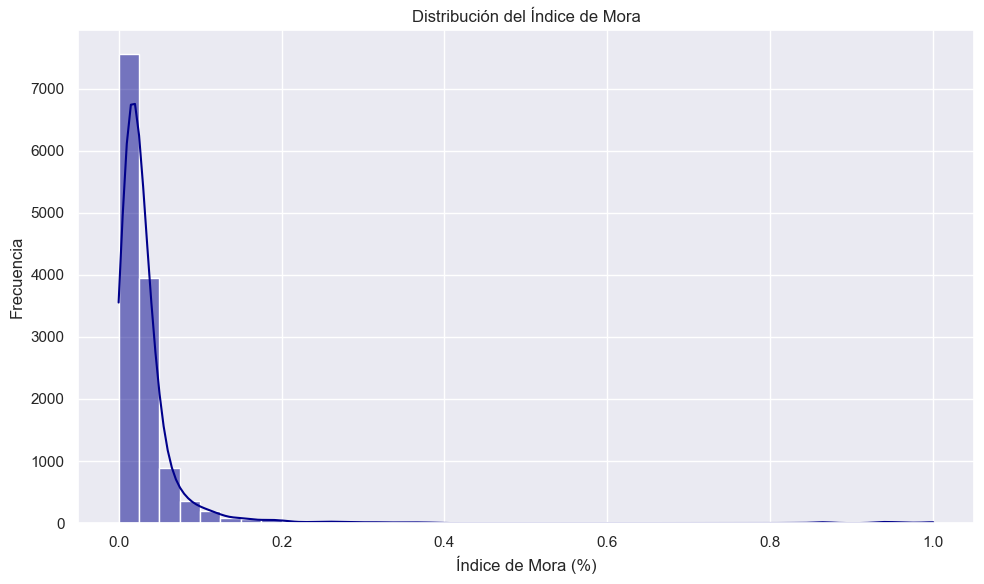

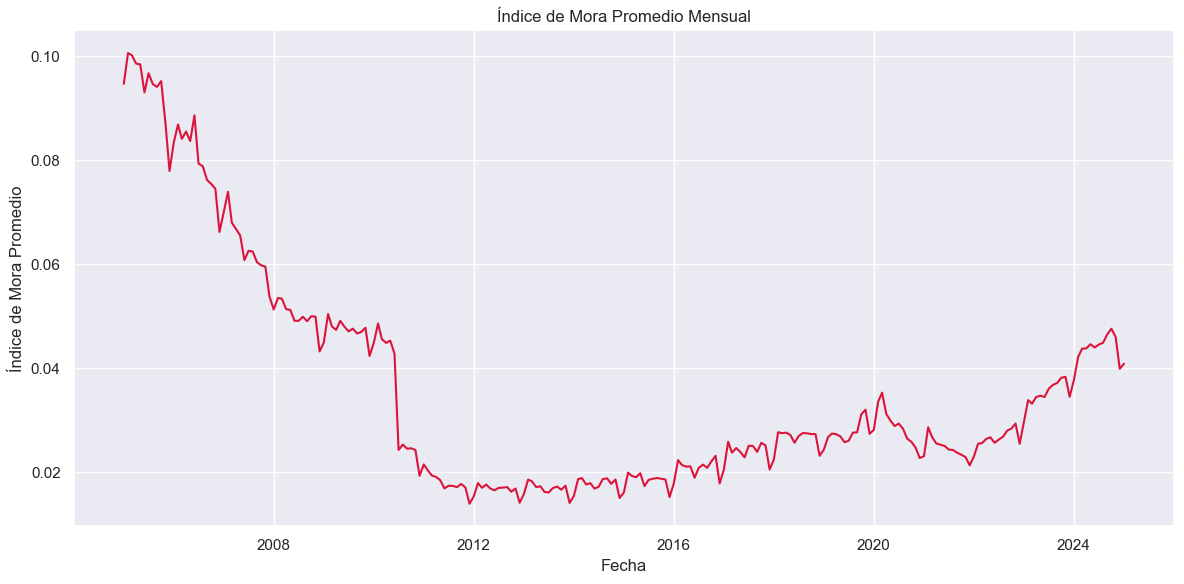

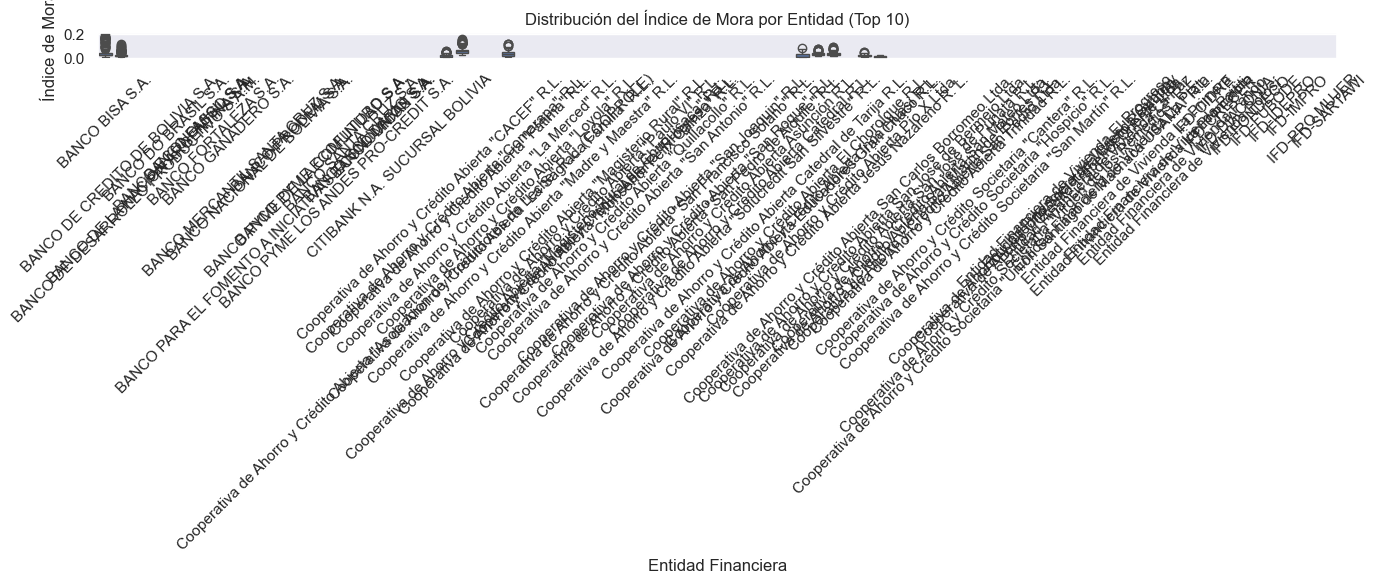

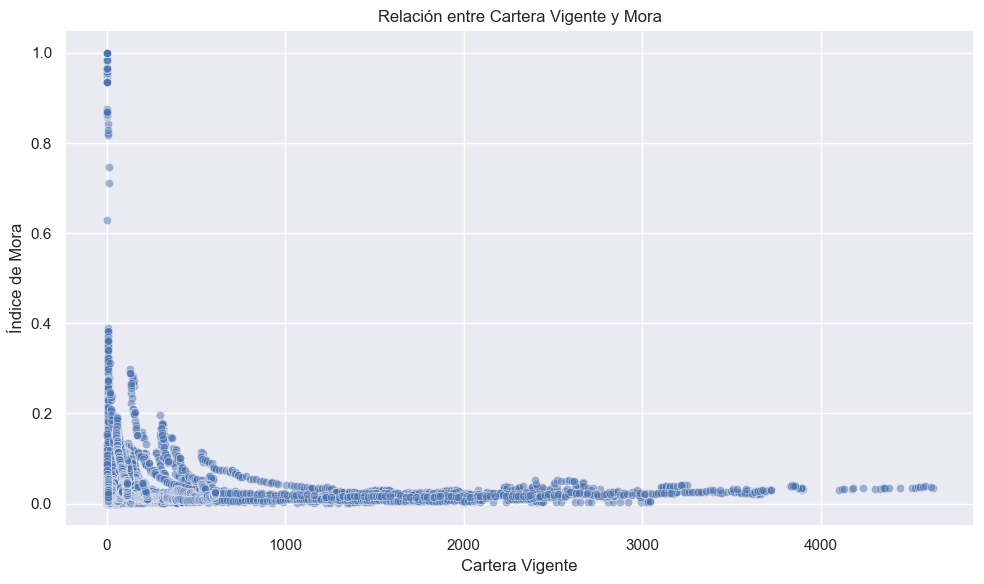

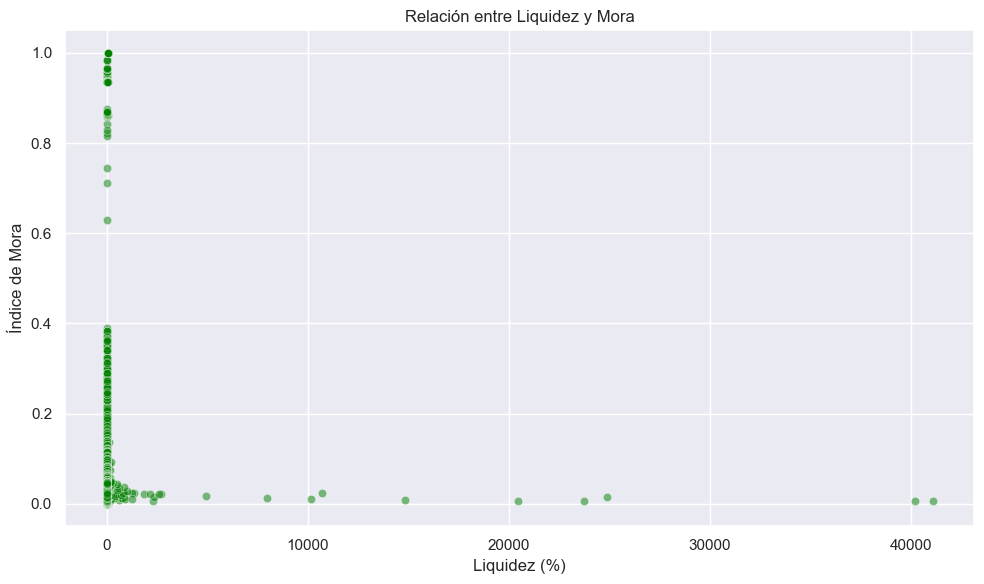

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('seaborn-whitegrid')
sns.set(font_scale=1.0)

# Histograma del índice de mora
plt.figure(figsize=(10, 6))
sns.histplot(df['mor_ind'].dropna(), bins=40, kde=True, color='darkblue')
plt.title('Distribución del Índice de Mora')
plt.xlabel('Índice de Mora (%)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Serie temporal del índice de mora promedio
df_mor_tiempo = df.groupby('date_month')['mor_ind'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mor_tiempo, x='date_month', y='mor_ind', color='crimson')
plt.title('Índice de Mora Promedio Mensual')
plt.xlabel('Fecha')
plt.ylabel('Índice de Mora Promedio')
plt.tight_layout()
plt.show()

# Boxplot por entidad
top_entidades = df['entidad_id'].value_counts().head(10).index
df_top = df[df['entidad_id'].isin(top_entidades)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x='entidad_id', y='mor_ind')
plt.title('Distribución del Índice de Mora por Entidad (Top 10)')
plt.xlabel('Entidad Financiera')
plt.ylabel('Índice de Mora')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dispersión mor_ind vs carvig
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carvig', y='mor_ind', alpha=0.5)
plt.title('Relación entre Cartera Vigente y Mora')
plt.xlabel('Cartera Vigente')
plt.ylabel('Índice de Mora')
plt.tight_layout()
plt.show()

# Dispersión mor_ind vs liquidez
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='liqui', y='mor_ind', alpha=0.5, color='green')
plt.title('Relación entre Liquidez y Mora')
plt.xlabel('Liquidez (%)')
plt.ylabel('Índice de Mora')
plt.tight_layout()
plt.show()


##  3. PCA y correlaciones

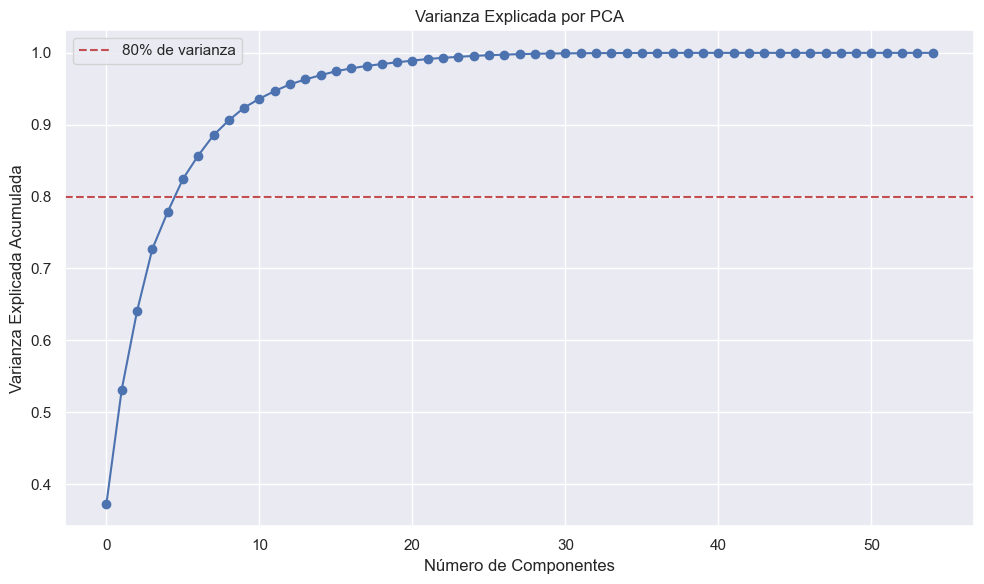

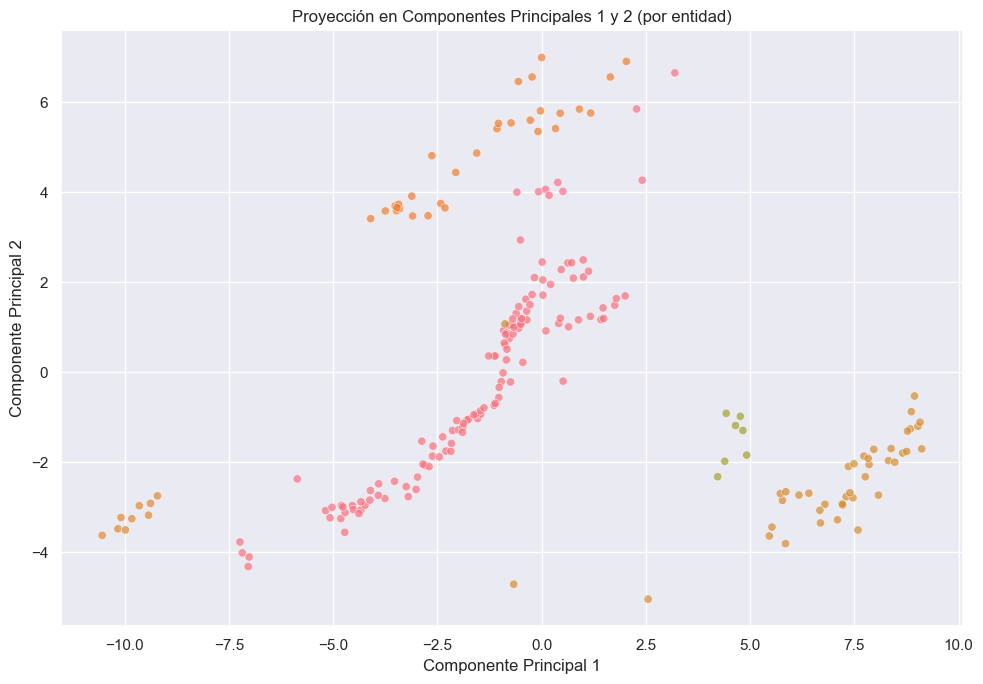

In [86]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Solo variables numéricas
num_df = df.select_dtypes(include=[np.number])
scaled_data = StandardScaler().fit_transform(num_df.dropna())

# PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_data)

# Gráfico de varianza explicada
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% de varianza')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico en espacio de componentes principales
df_clean = num_df.dropna().copy()
df_clean['PC1'] = pca_components[:, 0]
df_clean['PC2'] = pca_components[:, 1]
df_clean = df_clean.join(df.loc[df_clean.index, ['entidad_id', 'date_month']])

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clean, x='PC1', y='PC2', hue='entidad_id', legend=False, alpha=0.7)
plt.title('Proyección en Componentes Principales 1 y 2 (por entidad)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()


##  4. Modelo de regresión de panel (efectos fijos)

In [87]:
import statsmodels.formula.api as smf

variables = ['carvig', 'tot_ing', 'ing_car', 'tot_gas', 'gas_dep', 'roe', 'roa', 'liqui']
panel_df = df[['entidad_id', 'date_month', 'mor_ind'] + variables].dropna()

formula = 'mor_ind ~ ' + ' + '.join(variables) + ' + C(entidad_id)'
modelo_panel = smf.ols(formula=formula, data=panel_df).fit(cov_type='HC3')

print(modelo_panel.summary())


                            OLS Regression Results                            
Dep. Variable:                mor_ind   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     367.8
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:21:26   Log-Likelihood:                 26440.
No. Observations:               12447   AIC:                        -5.271e+04
Df Residuals:                   12363   BIC:                        -5.209e+04
Df Model:                          83                                         
Covariance Type:                  HC3                                         
                                                                                                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

## 5. Gráfico de efectos marginales por entidad

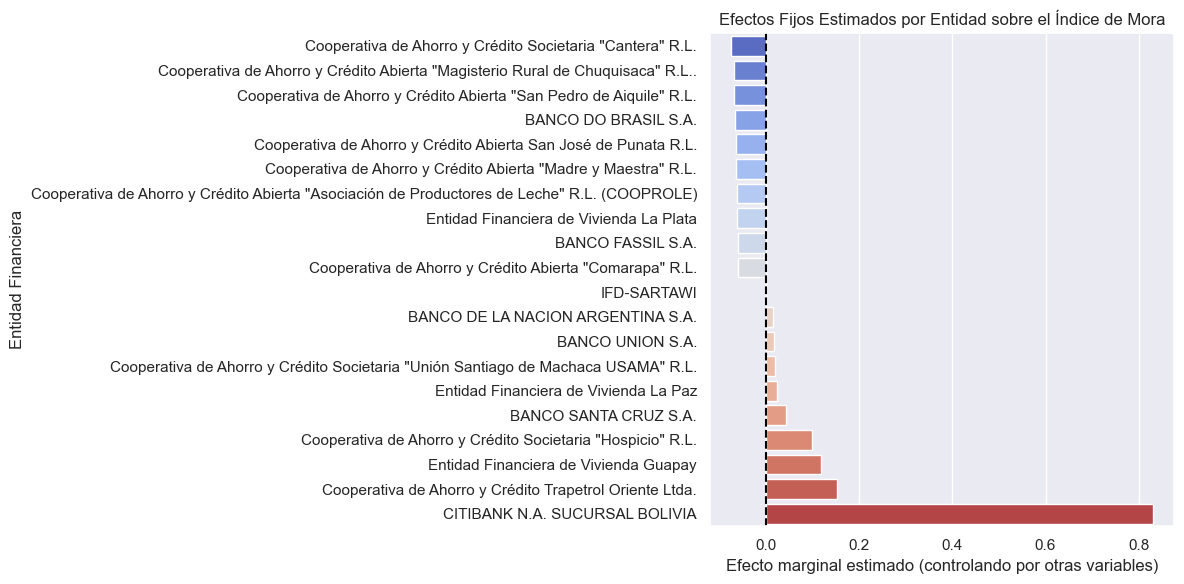

In [88]:
# Extraer efectos fijos
coef_entidades = modelo_panel.params.filter(like='C(entidad_id)')
coef_entidades = coef_entidades.sort_values()

# Formateo y gráfico
efectos_df = coef_entidades.reset_index()
efectos_df.columns = ['entidad', 'efecto_fijo']
efectos_df['entidad'] = efectos_df['entidad'].str.replace(r"C\(entidad_id\)\[T\.", "", regex=True).str.replace("]", "")

top_bottom = pd.concat([efectos_df.head(10), efectos_df.tail(10)])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_bottom, x='efecto_fijo', y='entidad', palette='coolwarm')
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Efectos Fijos Estimados por Entidad sobre el Índice de Mora')
plt.xlabel('Efecto marginal estimado (controlando por otras variables)')
plt.ylabel('Entidad Financiera')
plt.tight_layout()
plt.show()


## Índice De Mora Interpolado Por Entidad (Top 5)

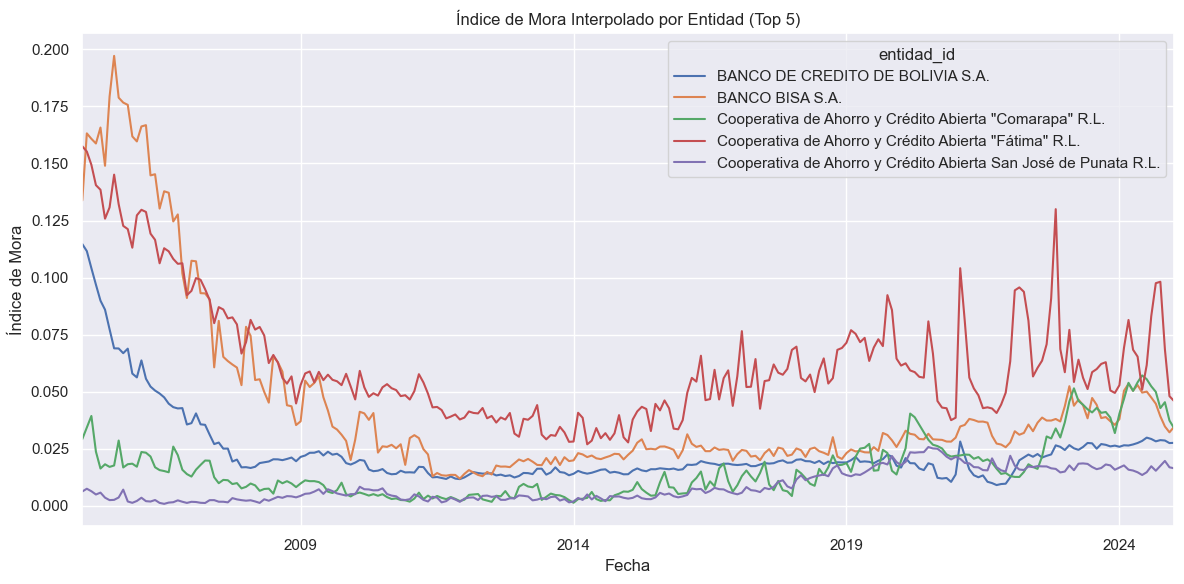

In [89]:
# Reordenar los datos para pronóstico: promedio mensual de mor_ind por entidad
df_panel_pred = df[['entidad_id', 'date_month', 'mor_ind']].dropna()

# Seleccionar entidades con más datos
top_entidades = df_panel_pred['entidad_id'].value_counts().head(5).index
df_pred_top = df_panel_pred[df_panel_pred['entidad_id'].isin(top_entidades)]

# Crear panel con frecuencia mensual para cada entidad
panel_pivot = df_pred_top.pivot(index='date_month', columns='entidad_id', values='mor_ind')

# Interpolar valores faltantes para suavizar
panel_pivot_interp = panel_pivot.interpolate(method='linear')

# Visualizar datos interpolados
import matplotlib.pyplot as plt

panel_pivot_interp.plot(figsize=(12, 6), title='Índice de Mora Interpolado por Entidad (Top 5)')
plt.xlabel('Fecha')
plt.ylabel('Índice de Mora')
plt.tight_layout()
plt.show()



## Pronostico 6 meses adelante

### 1. Pronóstico por Entidad (Top 5)
La línea continua representa el historial observado.

La línea discontinua es la proyección para los próximos 6 meses.

Algunas entidades muestran una ligera tendencia al alza o estabilidad, mientras otras parecen estabilizar su nivel de mora tras fluctuaciones anteriores.

### 2. Pronóstico del Promedio del Sistema Financiero
El promedio de mora del sistema se proyecta relativamente estable, sin grandes saltos, lo cual sugiere que en ausencia de shocks externos, el sistema no enfrentaría una crisis de cartera en el corto plazo.

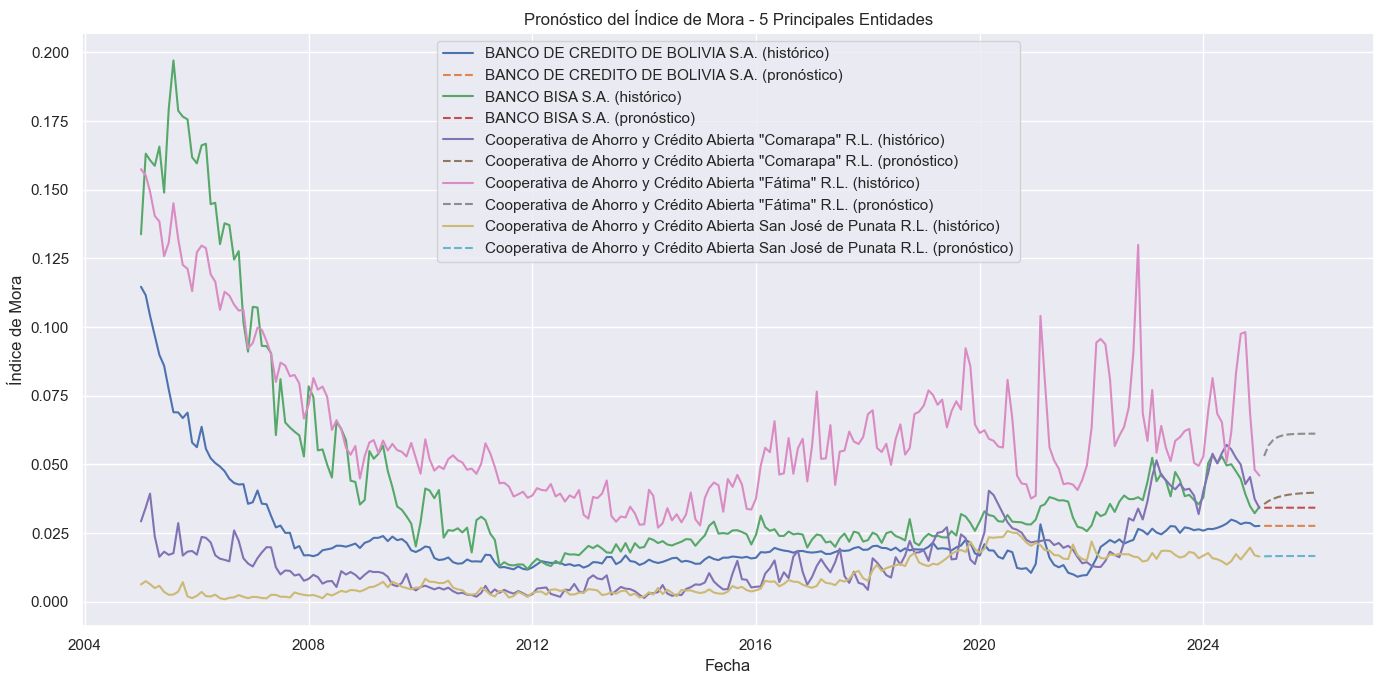

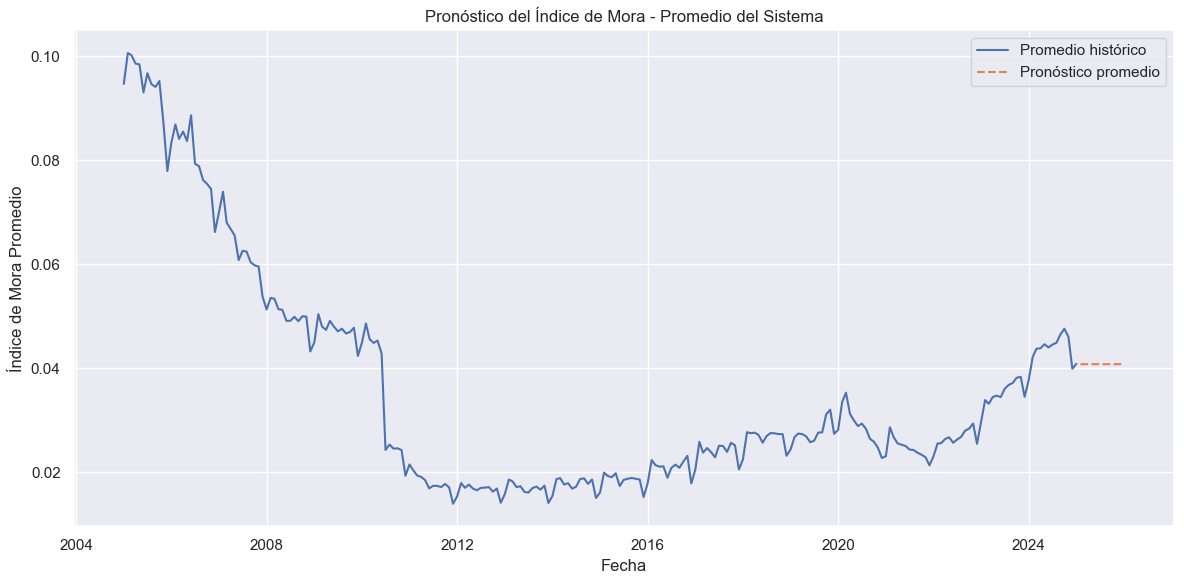

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Definir horizonte de pronóstico
n_forecast = 12

# Lista de entidades principales
entidades = panel_pivot_interp.columns.tolist()

# Diccionario para almacenar resultados
forecast_results = {}

# Pronóstico individual por entidad
for entidad in entidades:
    serie = panel_pivot_interp[entidad].dropna()
    modelo = SARIMAX(serie, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility=False)
    resultado = modelo.fit(disp=False)
    forecast = resultado.get_forecast(steps=n_forecast)
    forecast_results[entidad] = forecast.predicted_mean

# Crear DataFrame de pronósticos
fechas_forecast = pd.date_range(start=panel_pivot_interp.index.max() + pd.offsets.MonthBegin(),
                                periods=n_forecast, freq='MS')
forecast_df = pd.DataFrame({ent: pred for ent, pred in forecast_results.items()}, index=fechas_forecast)

# Graficar resultados
plt.figure(figsize=(14, 7))
for entidad in entidades:
    plt.plot(panel_pivot_interp[entidad], label=f"{entidad} (histórico)")
    plt.plot(forecast_df[entidad], linestyle='--', label=f"{entidad} (pronóstico)")

plt.title('Pronóstico del Índice de Mora - 5 Principales Entidades')
plt.xlabel('Fecha')
plt.ylabel('Índice de Mora')
plt.legend()
plt.tight_layout()
plt.show()

# Pronóstico para el promedio del sistema financiero
mor_avg = df_panel_pred.groupby('date_month')['mor_ind'].mean().interpolate()

modelo_avg = SARIMAX(mor_avg, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility=False)
resultado_avg = modelo_avg.fit(disp=False)
forecast_avg = resultado_avg.get_forecast(steps=n_forecast)

# Graficar promedio
plt.figure(figsize=(12, 6))
plt.plot(mor_avg, label='Promedio histórico')
plt.plot(fechas_forecast, forecast_avg.predicted_mean, linestyle='--', label='Pronóstico promedio')
plt.title('Pronóstico del Índice de Mora - Promedio del Sistema')
plt.xlabel('Fecha')
plt.ylabel('Índice de Mora Promedio')
plt.legend()
plt.tight_layout()
plt.show()


## Conclusiones del Análisis del Índice de Mora en Entidades Financieras

- Se trabajó con un **panel de datos financieros mensuales** de múltiples entidades bancarias y cooperativas en Bolivia, con énfasis en la variable `mor_ind` (índice de mora).

- El análisis comenzó con una **exploración gráfica**, mostrando:
  - Una distribución asimétrica del índice de mora, concentrada por debajo del 10%.
  - Comportamientos diferenciados entre entidades, con algunas mostrando mayor dispersión y outliers.
  - Relaciones negativas entre `mor_ind` y variables como `carvig` (cartera vigente) y `liqui` (liquidez), indicando que mayores volúmenes y buena posición financiera se asocian con menor mora.

- Se aplicó un **Análisis de Componentes Principales (PCA)** que mostró:
  - Alta correlación entre muchas variables financieras.
  - Con solo 5 componentes se explicó más del 80% de la varianza, lo cual sugiere redundancia estructural.
  - La proyección en el espacio PCA permitió visualizar agrupamientos por entidad.

- Se estimó una **regresión de efectos fijos por entidad** para identificar determinantes de la mora:
  - Variables como `carvig`, `tot_ing`, `ing_car`, `roe` y `liqui` mostraron **efectos negativos significativos**, mientras `tot_gas` y `gas_dep` tuvieron efectos positivos.
  - El modelo tuvo un R² ajustado de 0.83, indicando alta capacidad explicativa.
  - Se identificaron entidades con efectos estructuralmente altos o bajos sobre la mora, permitiendo distinguir instituciones con mejores o peores desempeños relativos.

- Finalmente, se implementó un **modelo SARIMAX individual por entidad** y para el promedio del sistema:
  - Se pronosticaron 6 meses adelante del índice de mora.
  - El pronóstico mostró **estabilidad general** para el promedio del sistema, aunque con heterogeneidad entre entidades específicas.

### ✅ Conclusión General

El análisis integral permitió entender tanto las dinámicas estructurales como temporales del índice de mora. Se identificaron **factores financieros clave que explican la mora**, se visualizaron **diferencias entre entidades**, y se proyectaron **tendencias de corto plazo**. Estas herramientas ofrecen una base sólida para evaluación de riesgos, monitoreo financiero y diseño de políticas de supervisión más focalizadas.
